In [1]:
from sqlalchemy import create_engine ,text

# Define your database credentials
user = "postgres"  # Replace with your username
password = "postgres"  # Replace with your password
host = "localhost"  # Replace with your host, e.g., "localhost" or IP address
port = 5432  # PostgreSQL's default port
db_name = "Flu-View"  # Replace with your database name

# Create the connection URL
engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{db_name}")

# Run a sample query
with engine.connect() as connection:
     query = text("SELECT * FROM flu_data_by_state LIMIT 5;")
     result = connection.execute(query)  # Replace 'your_table' with your table name
     for row in result:
        print(row)

(1, 'Alabama', 2024, 40, Decimal('758.0'), 'AL')
(2, 'Alaska', 2024, 40, Decimal('83.0'), 'AK')
(3, 'Arizona', 2024, 40, Decimal('1114.0'), 'AZ')
(4, 'Arkansas', 2024, 40, Decimal('242.0'), 'AR')
(5, 'California', 2024, 40, Decimal('6610.0'), 'CA')


In [2]:
import pandas as pd

In [3]:
with engine.connect() as connection:
     query = text('SELECT * FROM "State_Activity_Level" LIMIT 5;')
     result = connection.execute(query)  # Replace 'your_table' with your table name
     for row in result:
        print(row)

('Alabama', 'Level 1', 40, '2024-25')
('Alaska', 'Level 1', 40, '2024-25')
('Arizona', 'Level 1', 40, '2024-25')
('Arkansas', 'Level 1', 40, '2024-25')
('California', 'Level 1', 40, '2024-25')


In [4]:
with engine.connect() as connection:
     query = text('SELECT * FROM "AgeViewBySeason" LIMIT 5;')
     result = connection.execute(query)  # Replace 'your_table' with your table name
     for row in result:
        print(row)

('2024-25', '0-4 yr', 0, 0, 154, 132, 57, 6, 0, 3, 0)
('2024-25', '5-24 yr', 0, 0, 447, 301, 110, 60, 0, 17, 0)
('2024-25', '25-64 yr', 0, 0, 338, 302, 111, 16, 0, 12, 0)
('2024-25', '65+ yr', 0, 0, 164, 158, 57, 2, 0, 1, 0)


In [5]:
with engine.connect() as connection:
     query = text('SELECT * FROM "Mortality_Data" LIMIT 5;')
     result = connection.execute(query)  # Replace 'your_table' with your table name
     for row in result:
        print(row)

(40, 33, 55707)
(41, 25, 56241)
(42, 28, 56305)
(43, 22, 56134)
(44, 35, 54974)


In [6]:

flu_data_by_state = pd.read_sql("SELECT * FROM flu_data_by_state", engine)
mortality_data = pd.read_sql("SELECT * FROM \"Mortality_Data\"", engine)



In [7]:
state_activity_level = pd.read_sql("SELECT * FROM \"State_Activity_Level\"", engine)
virus_types = pd.read_sql("SELECT * FROM \"AgeViewBySeason\"", engine)

In [8]:
merged_data = flu_data_by_state.merge(mortality_data, on=[ 'WEEK'], how='inner')

merged_data.head()

,id,REGION,YEAR,WEEK,ILITOTAL,STATE_ABBR,INFLUENZA_DEATHS,TOTAL_DEATHS
0,1,Alabama,2024,40,758.0,AL,33,55707
1,2,Alaska,2024,40,83.0,AK,33,55707
2,3,Arizona,2024,40,1114.0,AZ,33,55707
3,4,Arkansas,2024,40,242.0,AR,33,55707
4,5,California,2024,40,6610.0,CA,33,55707


In [9]:
import plotly.express as px


In [14]:
fig = px.line(merged_data, x='WEEK', y='INFLUENZA_DEATHS', title='Influenza Deaths  Over Time')
fig.show()
fig.write_image("figure1.png")



This linegraph shows trends in mortality rates from week 40 to week 48 for all 50 US states and it demonstrates an increase in number of influenza related deaths from week 45.

In [15]:
# Group by YEAR, WEEK, and STATE_ABBR and sum the ILITOTAL cases
weekly_data = flu_data_by_state.groupby(['YEAR', 'WEEK', 'STATE_ABBR'])['ILITOTAL'].sum().reset_index()

# Check the first few rows of the grouped data
print(weekly_data.head())



   YEAR  WEEK STATE_ABBR  ILITOTAL
0  2024    40         AK      83.0
1  2024    40         AL     758.0
2  2024    40         AR     242.0
3  2024    40         AZ    1114.0
4  2024    40         CA    6610.0


In [16]:
import plotly.express as px
import pandas as pd

# Aggregate data to get total cases per week across all states
weekly_data_aggregated = weekly_data.groupby('WEEK', as_index=False)['ILITOTAL'].sum()

# Create a line plot to show flu trends over time
fig = px.line(
    weekly_data_aggregated,
    x='WEEK',
    y='ILITOTAL',
    title='Weekly Flu Cases Across All States',
    labels={'WEEK': 'Week Number', 'ILITOTAL': 'Total ILI Cases'}
)

# Show the plot
fig.show()
fig.write_image("figure2.png")


In [17]:
import pandas as pd

# Load the data (replace with the actual file path)
data = state_activity_level

# Check the data to ensure it's loaded correctly
print(data.head())


    STATENAME ACTIVITY_LEVEL  WEEK   SEASON
0     Alabama        Level 1    40  2024-25
1      Alaska        Level 1    40  2024-25
2     Arizona        Level 1    40  2024-25
3    Arkansas        Level 1    40  2024-25
4  California        Level 1    40  2024-25


In [18]:
# State name to abbreviation mapping
state_to_abbreviation = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX",
    "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


In [19]:
data['STATE_ABBR'] = data['STATENAME'].map(state_to_abbreviation)

#Check for any unmapped states
missing_states = data[data['STATE_ABBR'].isna()]
if not missing_states.empty:
    print("These states could not be mapped:", missing_states['STATE_ABBR'].unique())


These states could not be mapped: [nan]


In [20]:
data.head()

,STATENAME,ACTIVITY_LEVEL,WEEK,SEASON,STATE_ABBR
0,Alabama,Level 1,40,2024-25,AL
1,Alaska,Level 1,40,2024-25,AK
2,Arizona,Level 1,40,2024-25,AZ
3,Arkansas,Level 1,40,2024-25,AR
4,California,Level 1,40,2024-25,CA


In [21]:
activity_map = {
    'Level 1': 1,
    'Level 2': 2,
    'Level 3': 3,
    'Level 4': 4,
    'Level 5': 5,
    'Level 6': 6,
    'Level 7': 7,
    'Level 8': 8,
    
}

In [22]:
data['ACTIVITY LEVEL NUMERIC'] = data['ACTIVITY_LEVEL'].map(activity_map)
#state_activity = data.groupby('STATE_ABBR')['ACTIVITY LEVEL NUMERIC'].mean().reset_index()


In [24]:
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    data_frame=data,
    locations="STATE_ABBR",  # State names
    locationmode="USA-states",  # Use USA-states mode for state names
    color="ACTIVITY LEVEL NUMERIC",  # Activity levels (mapped to numbers)
    hover_name="STATENAME",  # Hover over the state to show the name
    hover_data=["ACTIVITY LEVEL NUMERIC", "WEEK"],  # Additional info on hover
    animation_frame="WEEK",  # Animate the map by week
    color_continuous_scale="Viridis",
    scope="usa",# Color scale for the activity levels
    title="Influenza Activity Levels by State Over Time"  # Title of the map
)

# Show the map
fig.show()
fig.write_image("figure3.png")


This choropleth map  provides a visual summary of how influenza activity fluctuates, helping to understand which areas are most affected at any given time. 

In [25]:
filtered_data = data[data['WEEK'] == 48]


In [26]:
fig = px.choropleth(
    data_frame=filtered_data,
    locations="STATE_ABBR",  # State names
    locationmode="USA-states",  # Use USA-states mode for state names
    color="ACTIVITY_LEVEL",  # Activity levels (mapped to numbers)
    hover_name="STATENAME",  # Hover over the state to show the name
    hover_data=["ACTIVITY_LEVEL", "WEEK"],  # Additional info on hover
     # Animate the map by week
    color_continuous_scale="Viridis",
    scope="usa",# Color scale for the activity levels
    title="Influenza Activity Levels by State Over Time"  # Title of the map
)
fig.show()
fig.write_image("figure4.png") 


In [27]:
# Map activity levels to numeric values
activity_map = {
    'Level 1': 1,
    'Level 2': 2,
    'Level 3': 3,
    'Level 4': 4,
    'Level 5': 5,
    'Level 6': 6,
    'Level 7': 7,
    'Level 8': 8,
    
}

data['ACTIVITY LEVEL NUMERIC'] = data['ACTIVITY_LEVEL'].map(activity_map)
state_activity = data.groupby('STATE_ABBR')['ACTIVITY LEVEL NUMERIC'].mean().reset_index()

# Step 2: Sort by activity level and select the top 10 states
top_5_states = state_activity.nlargest(10, 'ACTIVITY LEVEL NUMERIC')


# Filter data to show only states with activity (Level 5 or above)
df_filtered = data[(data['STATE_ABBR'].isin(top_5_states['STATE_ABBR']))&
                  (data['ACTIVITY LEVEL NUMERIC']>3)]
df_filtered

,STATENAME,ACTIVITY_LEVEL,WEEK,SEASON,STATE_ABBR,ACTIVITY LEVEL NUMERIC
85,New Jersey,Level 4,41,2024-25,NJ,4.0
116,Connecticut,Level 4,42,2024-25,CT,4.0
124,Indiana,Level 4,42,2024-25,IN,4.0
140,New Jersey,Level 5,42,2024-25,NJ,5.0
145,Ohio,Level 4,42,2024-25,OH,4.0
...,...,...,...,...,...,...
965,New Jersey,Level 7,48,2024-25,NJ,7.0
967,New York,Level 4,48,2024-25,NY,4.0
970,Ohio,Level 5,48,2024-25,OH,5.0
975,South Carolina,Level 5,48,2024-25,SC,5.0


In [28]:
import pandas as pd
import plotly.express as px

# Assuming df contains the data
# Step 1: Aggregate data to calculate total/average activity level by state
state_activity = data.groupby('STATE_ABBR')['ACTIVITY LEVEL NUMERIC'].mean().reset_index()

# Step 2: Sort by activity level and select the top 10 states
top_5_states = state_activity.nlargest(5, 'ACTIVITY LEVEL NUMERIC')

# Step 3: Filter the original dataset for only the top 5 states
df_filtered = data[(data['STATE_ABBR'].isin(top_5_states['STATE_ABBR']))&
                  (data['ACTIVITY LEVEL NUMERIC']>3)]

# Step 4: Create the bar chart
fig = px.bar(
    df_filtered, 
    x='WEEK',  # Assuming WEEK column exists
    y='ACTIVITY LEVEL NUMERIC', 
    color='STATE_ABBR', 
    title='Top 5 States with Highest Activity Levels by Week',
    labels={'ACTIVITY LEVEL NUMERIC': 'Activity Level'},
    category_orders={'ACTIVITY_LEVEL': ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']}
)

# Step 5: Update axes labels
fig.update_xaxes(title='Week')
fig.update_yaxes(title='Activity Level')

# Display the chart
fig.show()
fig.write_image("figure5.png")


This bar graph plots top 5 highest active states namely Connecticut,Indiana,New Jersey,New York and Wisconsin which is consistently highest for 5 weeks.

In [29]:
# Aggregate ILITOTAL by state
agg_data = flu_data_by_state.groupby('STATE_ABBR')['ILITOTAL'].sum().reset_index()

print(agg_data.head())


  STATE_ABBR  ILITOTAL
0         AK     741.0
1         AL    9393.0
2         AR    2377.0
3         AZ   16013.0
4         CA   76809.0


In [30]:
df = pd.read_csv('Virus_Types_by_State.csv')

In [31]:
df.head()

,REGION,WEEK,TOTAL_SPECIMENS,TOTAL_A,TOTAL_B
0,Alabama,40,299,2,0
1,Alaska,40,X,X,X
2,Arizona,40,339,5,0
3,Arkansas,40,405,1,0
4,California,40,6336,98,4


In [32]:
import matplotlib.pyplot as plt

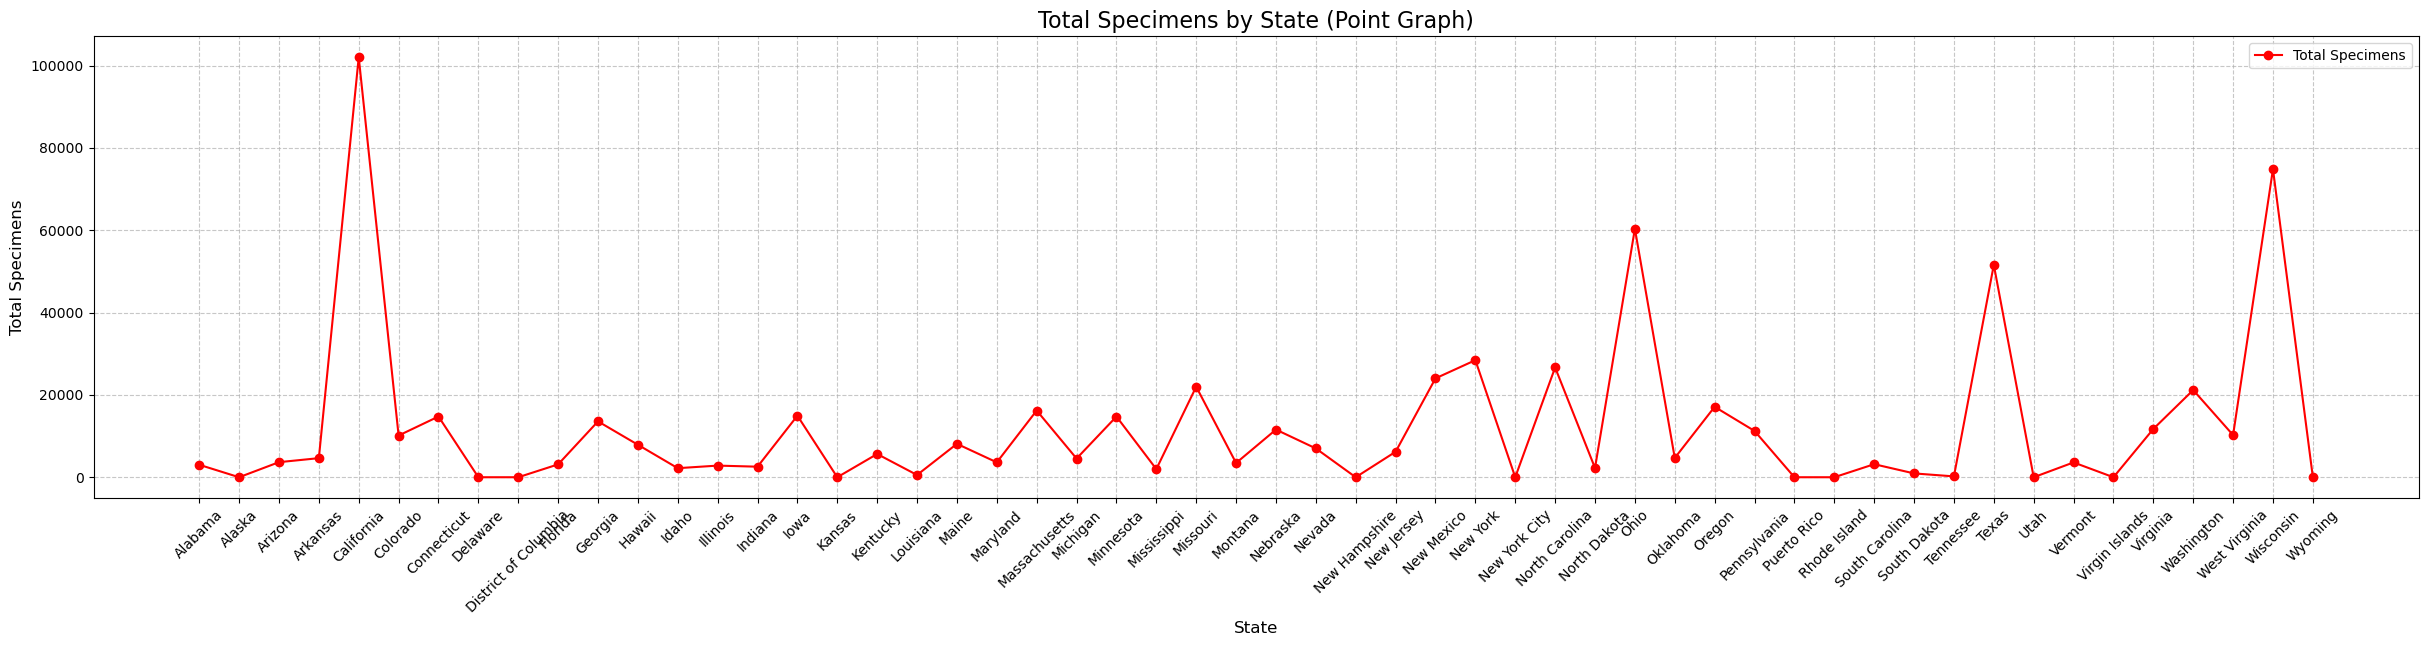

In [33]:
# Convert 'TOTAL SPECIMENS' to numeric, forcing errors to NaN
df['TOTAL_SPECIMENS'] = pd.to_numeric(df['TOTAL_SPECIMENS'], errors='coerce')

# Grouping data by 'REGION' and summing the 'TOTAL SPECIMENS'
state_data = df.groupby('REGION')['TOTAL_SPECIMENS'].sum()

# Plotting the point graph
plt.figure(figsize=(30, 6))  # Increase the width to ensure all states fit
plt.plot(state_data.index, state_data.values, marker='o', linestyle='-', color='red', label='Total Specimens')

# Adding labels and title
plt.title('Total Specimens by State (Point Graph)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Specimens', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()

# Display the point graph
plt.show()

This point graph plotted with matplotlib displays total number of specimens collected for virus types in flu cases.

In [34]:
# Converting 'TOTAL SPECIMENS' to numeric, ignoring errors
df['TOTAL_SPECIMENS'] = pd.to_numeric(df['TOTAL_SPECIMENS'], errors='coerce')

# Grouping data by 'REGION' and summing the 'TOTAL SPECIMENS'
state_data = df.groupby('REGION')['TOTAL_SPECIMENS'].sum()

# Sort the data in descending order
state_data_sorted = state_data.sort_values(ascending=False)

# Optionally, keep only the top 10 and group others
top_n = 10
others = state_data_sorted.iloc[top_n:].sum()
state_data_sorted = state_data_sorted.iloc[:top_n]
state_data_sorted['Others'] = others

# Create an interactive pie chart using Plotly
fig = px.pie(state_data_sorted, 
             names=state_data_sorted.index, 
             values=state_data_sorted,
             title="Total Specimens by State (Pie Chart)", 
             color=state_data_sorted.index,  # Adds colors to each slice
             color_discrete_sequence=px.colors.qualitative.Set3)  # A valid color palette

# Show the pie chart
fig.show()
fig.write_image("figure6.png")

The pie chart provides insights into the distribution of specimens by state, allowing us to identify key patterns and trends,like states with larger slices may have high population density or have more robust sampling efforts or higher prevelance of the disease.

In [36]:
import plotly.express as px
import pandas as pd
df = virus_types



# Create a bar chart using Plotly
fig = px.bar(df, 
             x='AgeGroup', 
             y=df.columns[1:], 
             title='Influenza Strain Cases by Age Group',
             labels={'value': 'Number of Cases', 'variable': 'Influenza Strain'},
             barmode='stack')

# Show the chart
fig.show()
fig.write_image("figure7.png")

This bar chart plots various Influenza strains by Age group.A_H3 and A_H1N1 are predominant across all ages.B strains are less of a concern.The distribution of flu strains does not vary drastically between the different age groups, suggesting that flu affects all age groups in a somewhat similar manner, with A (H3) being the primary strain.